Saving Titanic.csv to Titanic.csv


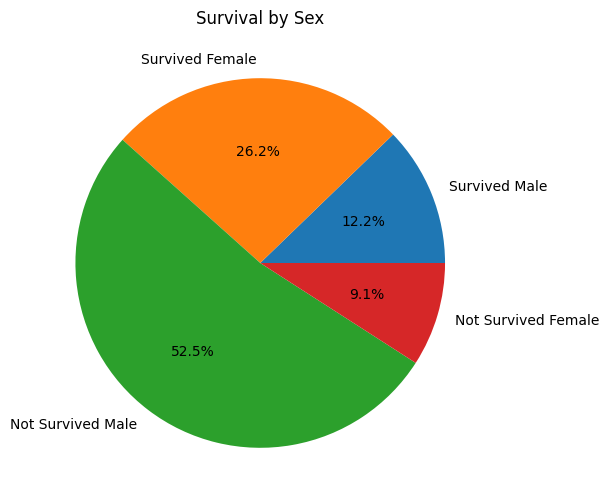

Survival Rate Male: 18.89%
Survival Rate Female: 74.20%
survived    0    1
sex               
female     81  233
male      468  109


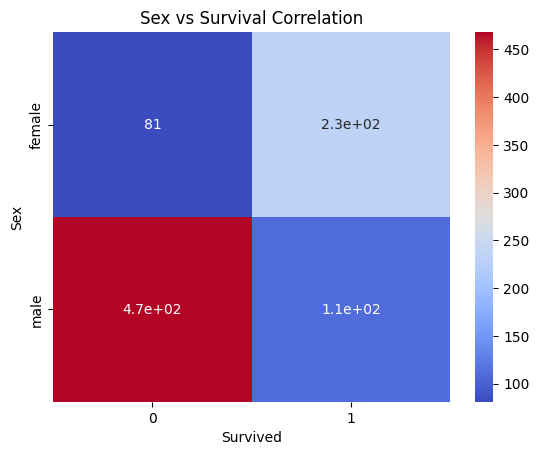

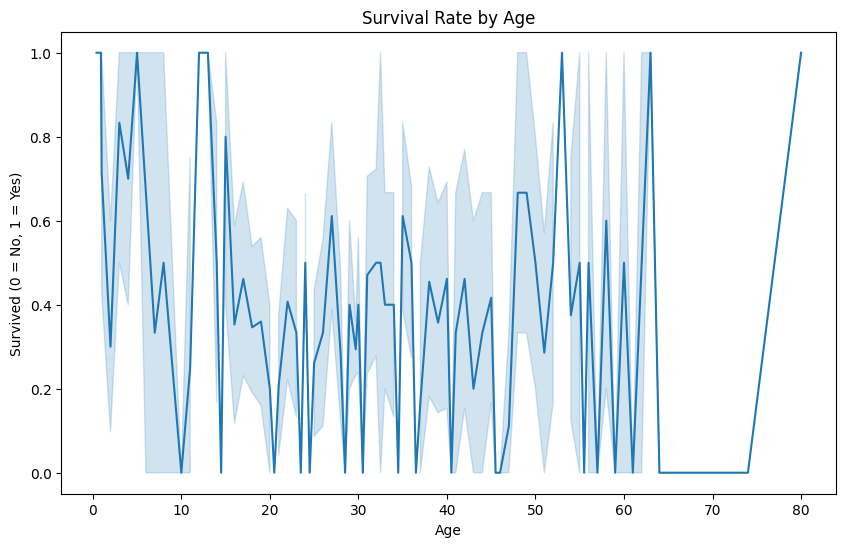

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load Data
uploaded = files.upload()
data = pd.read_csv('Titanic.csv')

# Data Cleaning
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Relationship between Sex and Survived

## Pie Chart
survived_male = len(data[(data['sex'] == 'male') & (data['survived'] == 1)])
survived_female = len(data[(data['sex'] == 'female') & (data['survived'] == 1)])
not_survived_male = len(data[(data['sex'] == 'male') & (data['survived'] == 0)])
not_survived_female = len(data[(data['sex'] == 'female') & (data['survived'] == 0)])

labels = ['Survived Male', 'Survived Female', 'Not Survived Male', 'Not Survived Female']
sizes = [survived_male, survived_female, not_survived_male, not_survived_female]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Survival by Sex')
plt.show()

## Survival Rate by Sex
survival_rate_male = len(data[(data['sex'] == 'male') & (data['survived'] == 1)]) / len(data[data['sex'] == 'male'])
survival_rate_female = len(data[(data['sex'] == 'female') & (data['survived'] == 1)]) / len(data[data['sex'] == 'female'])

print(f'Survival Rate Male: {survival_rate_male:.2%}')
print(f'Survival Rate Female: {survival_rate_female:.2%}')

## Crosstab
crosstab = pd.crosstab(data['sex'], data['survived'])
print(crosstab)

# Heatmap
corr_matrix = pd.crosstab(data['sex'], data['survived'])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Sex vs Survival Correlation')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()

# Line Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='survived', data=data)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.show()



